In [7]:
import numpy as np
import pickle
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

# Hier werden Daten aus den vorherigen Notebook geladen

%store -r X_train
%store -r X_test
%store -r y_train
%store -r y_test

# Entscheidungsbaum als Trainingsmodell

Hier wird erstmal einen Entscheidungsbaummodell erstellt und mit Daten trainiert. Anschliessend wird die Genauigkeit des Modells geprüft.

Die Genauigkeit liegt zwischen 0,72 und 0,77

In [8]:
DTC = DecisionTreeClassifier()
dtcModel = DTC.fit(X_train, y_train)
print(dtcModel.score(X_test,y_test))

0.686


## Prediction - mit Entscheidungsbaum als Trainingsmodell

### Prediction bezieht sich auf die Ausgabe eines Algorithmus, nachdem er auf einem historischen Datensatz trainiert und bei der Prognose der Wahrscheinlichkeit eines bestimmten Ergebnisses auf neue Daten angewendet wurde.


In [9]:
y_pred=dtcModel.predict(X_test)

## Modell bewerten - mittels Confusion Matrix und Accuracy Score

### Eine Confusion Matrix ist eine tabellarische Zusammenfassung der Anzahl der richtigen und falschen Vorhersagen eines Klassifikators. Es kann verwendet werden, um die Leistung eines Klassifizierungsmodells durch die Berechnung von Leistungsmetriken wie Genauigkeit und Präzision zu bewerten.

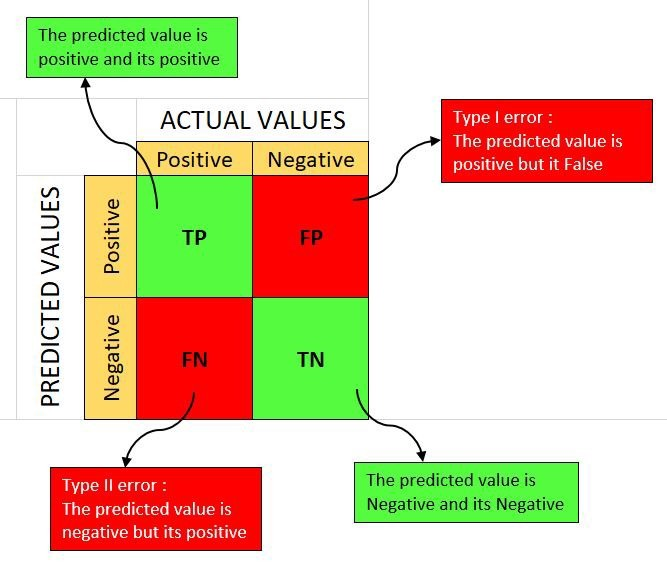

### Die Accuracy score ist eine Metrik für die Bewertung von Klassifizierungsmodellen. Informell gesehen ist Genauigkeit der Bruchteil der Vorhersagen, die unser Modell richtig gemacht hat. Formal hat Genauigkeit die folgende Definition: Genauigkeit = Anzahl der richtigen Vorhersagen dividiert durch Gesamtzahl der Vorhersagen.

In [10]:
cm = confusion_matrix(y_test, y_pred)
score = accuracy_score(y_test,y_pred)
print(cm,score*100)

[[3256 1580]
 [1560 3604]] 68.60000000000001


# Speichern des Modells - das trainierte Modell wird als Datei gespeichert

- das trainierte Modell wird verwendet um neue Reviews zu bewerten

In [11]:
# Save trained model to file
pickle.dump(dtcModel, open("dtc_review.pkl", "wb"))

## Erneutes Laden des Modells in einer Variable

- um zu überprüfen das das Modell richtig gespeichert wurde

In [12]:
loaded_model = pickle.load(open("dtc_review.pkl", "rb"))
y_pred_new = loaded_model.predict(X_test)
loaded_model.score(X_test,y_test)

del X_train
del X_test
del y_train
del y_test